In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

mp.rcParams['axes.unicode_minus'] = False

In [24]:
fm = mp.font_manager.FontManager()
plt.rcParams["font.family"] = 'Malgun Gothic'

In [25]:
pd.set_option('display.max_columns',40)

In [26]:
df_under = pd.read_csv('./data/12_범죄자 연령(14세 미만 포함)_홍상석1.csv', thousands = ',')
df_under.head()

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,계.5,계.6,계.7,계.8,계.9,계.10,계.11,계.12,계.13,계.14,계.15,계.16,계.17,계.18,계.19,계.20,계.21,계.22,계.23,계.24,계.25
0,No,자료시점,분류,분류,분류,계,소년(소계),소년(소계),소년(소계),소년(소계),소년(소계),소년(소계),소년(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),성인(소계),미상
1,No,자료시점,분류,분류,분류,계,소년(소계),14세미만,14세,15세,16세,17세,18세,성인(소계),19세,20세,21세,22세,23세,24세,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2014년,계,계[입력치],계[입력치],"1,879,548","77,594",37,"9,712","14,041","16,940","17,517","19,347","1,773,556","20,742","15,900","18,544","22,915","23,685","24,727","25,415","154,669","190,948","190,494","247,919","253,608","253,651","164,939","127,282","38,118","28,398"
4,2,2014년,형법범,형법범계[입력치],형법범계[입력치],"949,859","63,145",27,"8,888","12,268","13,552","13,621","14,789","870,746","15,201","10,972","11,959","13,789","13,315","12,674","12,079","67,037","87,490","89,984","120,142","124,880","126,790","82,569","61,977","19,888","15,968"


In [27]:
df_under = df_under.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계':'총합계','계.1':'소년(소계)',
                                    '계.2':'14세미만','계.3':'14세','계.4':'15세','계.5':'16세','계.6':'17세','계.7':'18세',
                                    '계.8':'성인(소계)','계.9':'19세','계.10':'20세','계.11':'21세','계.12':'22세','계.13':'23세',
                                    '계.14':'24세','계.15':'25세','계.16':'26~30세','계.17':'31~35세','계.18':'36~40세',
                                    '계.19':'41~45세','계.20':'46~50세','계.21':'51~55세','계.22':'56~60세','계.23':'61~70세',
                                    '계.24':'71세이상','계.25':'미상'})

In [28]:
df_under = df_under.drop(index = [0,1,2])

In [29]:
df_under.head()

,No,자료시점,대분류,중분류,소분류,총합계,소년(소계),14세미만,14세,15세,16세,17세,18세,성인(소계),19세,20세,21세,22세,23세,24세,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상,미상
3,1,2014년,계,계[입력치],계[입력치],"1,879,548","77,594",37,"9,712","14,041","16,940","17,517","19,347","1,773,556","20,742","15,900","18,544","22,915","23,685","24,727","25,415","154,669","190,948","190,494","247,919","253,608","253,651","164,939","127,282","38,118","28,398"
4,2,2014년,형법범,형법범계[입력치],형법범계[입력치],"949,859","63,145",27,"8,888","12,268","13,552","13,621","14,789","870,746","15,201","10,972","11,959","13,789","13,315","12,674","12,079","67,037","87,490","89,984","120,142","124,880","126,790","82,569","61,977","19,888","15,968"
5,3,2014년,형법범,재산범죄,재산범죄의 계[입력치],"411,083","36,271",6,"5,848","7,795","8,559","7,407","6,656","367,782","6,649","4,985","5,077","5,564","5,223","5,094","4,857","27,433","36,121","38,351","51,521","53,075","53,709","34,912","26,584","8,627","7,030"
6,4,2014년,형법범,재산범죄,배임,"11,740",3,0,2,0,0,1,0,"10,980",1,4,5,8,12,10,13,246,597,"1,120","1,739","1,826","1,954","1,525","1,398",522,757
7,5,2014년,형법범,재산범죄,사기,"232,827","7,251",3,384,835,"1,586","2,077","2,366","221,150","3,064","2,550","2,507","2,764","2,741","2,635","2,593","15,760","21,928","23,943","32,785","34,092","34,405","21,602","14,502","3,279","4,426"


In [30]:
thousands = ['총합계', '소년(소계)', '14세미만','14세','15세','16세','17세','18세','성인(소계)','19세','20세','21세','22세',
             '23세','24세','25세','26~30세','31~35세','36~40세','41~45세','46~50세','51~55세','56~60세','61~70세','71세이상',
             '미상']
 
for thousand in thousands:
    df_under[thousand]=df_under[thousand].str.replace(',','')

In [31]:
df_under.head(5)

,No,자료시점,대분류,중분류,소분류,총합계,소년(소계),14세미만,14세,15세,16세,17세,18세,성인(소계),19세,20세,21세,22세,23세,24세,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상,미상
3,1,2014년,계,계[입력치],계[입력치],1879548,77594,37,9712,14041,16940,17517,19347,1773556,20742,15900,18544,22915,23685,24727,25415,154669,190948,190494,247919,253608,253651,164939,127282,38118,28398
4,2,2014년,형법범,형법범계[입력치],형법범계[입력치],949859,63145,27,8888,12268,13552,13621,14789,870746,15201,10972,11959,13789,13315,12674,12079,67037,87490,89984,120142,124880,126790,82569,61977,19888,15968
5,3,2014년,형법범,재산범죄,재산범죄의 계[입력치],411083,36271,6,5848,7795,8559,7407,6656,367782,6649,4985,5077,5564,5223,5094,4857,27433,36121,38351,51521,53075,53709,34912,26584,8627,7030
6,4,2014년,형법범,재산범죄,배임,11740,3,0,2,0,0,1,0,10980,1,4,5,8,12,10,13,246,597,1120,1739,1826,1954,1525,1398,522,757
7,5,2014년,형법범,재산범죄,사기,232827,7251,3,384,835,1586,2077,2366,221150,3064,2550,2507,2764,2741,2635,2593,15760,21928,23943,32785,34092,34405,21602,14502,3279,4426


In [32]:
df_under['총합계'] = df_under['총합계'].astype(float)
df_under['소년(소계)'] = df_under['소년(소계)'].astype(float)
df_under['14세미만'] = df_under['14세미만'].astype(float)
df_under['14세'] = df_under['14세'].astype(float)
df_under['15세'] = df_under['15세'].astype(float)
df_under['16세'] = df_under['16세'].astype(float)
df_under['17세'] = df_under['17세'].astype(float)
df_under['18세'] = df_under['18세'].astype(float)
df_under['성인(소계)'] = df_under['성인(소계)'].astype(float)
df_under['19세'] = df_under['19세'].astype(float)
df_under['20세'] = df_under['20세'].astype(float)
df_under['21세'] = df_under['21세'].astype(float)
df_under['22세'] = df_under['22세'].astype(float)
df_under['23세'] = df_under['23세'].astype(float)
df_under['24세'] = df_under['24세'].astype(float)
df_under['25세'] = df_under['25세'].astype(float)
df_under['26~30세'] = df_under['26~30세'].astype(float)
df_under['31~35세'] = df_under['31~35세'].astype(float)
df_under['36~40세'] = df_under['36~40세'].astype(float)
df_under['41~45세'] = df_under['41~45세'].astype(float)
df_under['46~50세'] = df_under['46~50세'].astype(float)
df_under['51~55세'] = df_under['51~55세'].astype(float)
df_under['56~60세'] = df_under['56~60세'].astype(float)
df_under['61~70세'] = df_under['61~70세'].astype(float)
df_under['71세이상'] = df_under['71세이상'].astype(float)
df_under['미상'] = df_under['미상'].astype(float)

In [33]:
pd.set_option('display.max_rows',1000)

In [44]:
df_und2 = df_under[df_under["대분류"].str.contains("계", case=False, na=True)].copy()
df_und2.head(1000)

,No,자료시점,대분류,중분류,소분류,총합계,소년(소계),14세미만,14세,15세,16세,17세,18세,성인(소계),19세,20세,21세,22세,23세,24세,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상,미상
3,1,2014년,계,계[입력치],계[입력치],1879548.0,77594.0,37.0,9712.0,14041.0,16940.0,17517.0,19347.0,1773556.0,20742.0,15900.0,18544.0,22915.0,23685.0,24727.0,25415.0,154669.0,190948.0,190494.0,247919.0,253608.0,253651.0,164939.0,127282.0,38118.0,28398.0
177,175,2015년,계,계[입력치],계[입력치],1948966.0,71035.0,64.0,7.0,14387.0,17624.0,18231.0,20722.0,1817924.0,24079.0,19307.0,19177.0,25344.0,28108.0,27533.0,28261.0,153167.0,190059.0,186159.0,238266.0,257734.0,254352.0,181159.0,140884.0,44335.0,60007.0
351,349,2016년,계,계[입력치],계[입력치],2020196.0,76000.0,84.0,7530.0,13789.0,17589.0,17607.0,19401.0,1897655.0,22963.0,20759.0,20405.0,25995.0,30181.0,32003.0,31053.0,158537.0,194990.0,198261.0,236612.0,262341.0,256499.0,197955.0,159803.0,49298.0,46541.0
525,523,2017년,계,계[입력치],계[입력치],1861796.0,72759.0,93.0,7703.0,12376.0,16391.0,17358.0,18838.0,1745478.0,20882.0,19396.0,20275.0,24202.0,27377.0,30427.0,31726.0,144360.0,164623.0,180967.0,203467.0,237828.0,227841.0,196968.0,165006.0,50133.0,43559.0
699,697,2018년,계,계[입력치],계[입력치],1749459.0,66142.0,NaN,8321.0,11595.0,13306.0,15513.0,17407.0,1637944.0,19414.0,18017.0,18463.0,22938.0,25347.0,26865.0,29421.0,133269.0,140005.0,168897.0,180180.0,220190.0,212241.0,195107.0,173427.0,54163.0,45373.0
873,871,2019년,계,계[입력치],계[입력치],1754808.0,66247.0,NaN,9053.0,11730.0,13548.0,14338.0,17578.0,1657252.0,20511.0,18351.0,19579.0,22538.0,25012.0,26398.0,28007.0,137049.0,131076.0,169713.0,172082.0,216817.0,210138.0,203731.0,193466.0,62784.0,31309.0


#                      df_und2 = df_und2.fillna(0)

In [35]:
df_und3 = df_und2.copy()

In [36]:
df_und3 = df_und3.drop(['총합계','소년(소계)','성인(소계)'], axis='columns')      

<AxesSubplot:>

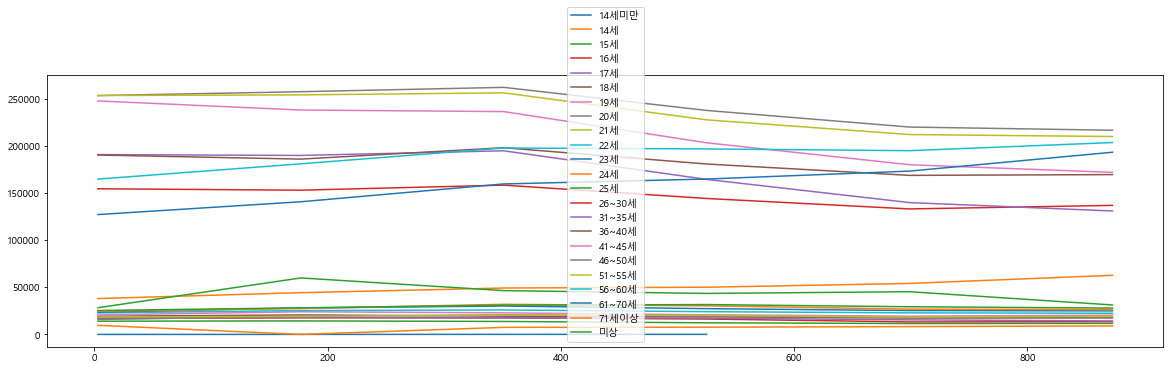

In [37]:
df_und3.plot(figsize=(20, 5))

<AxesSubplot:xlabel='자료시점'>

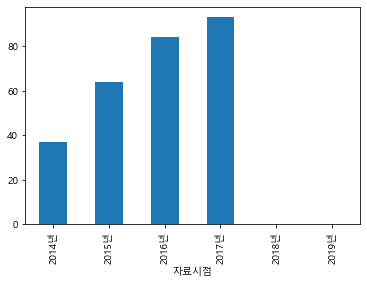

In [38]:
df_und2.groupby('자료시점')['14세미만'].mean().plot.bar()

In [45]:
df_und2

,No,자료시점,대분류,중분류,소분류,총합계,소년(소계),14세미만,14세,15세,16세,17세,18세,성인(소계),19세,20세,21세,22세,23세,24세,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상,미상
3,1,2014년,계,계[입력치],계[입력치],1879548.0,77594.0,37.0,9712.0,14041.0,16940.0,17517.0,19347.0,1773556.0,20742.0,15900.0,18544.0,22915.0,23685.0,24727.0,25415.0,154669.0,190948.0,190494.0,247919.0,253608.0,253651.0,164939.0,127282.0,38118.0,28398.0
177,175,2015년,계,계[입력치],계[입력치],1948966.0,71035.0,64.0,7.0,14387.0,17624.0,18231.0,20722.0,1817924.0,24079.0,19307.0,19177.0,25344.0,28108.0,27533.0,28261.0,153167.0,190059.0,186159.0,238266.0,257734.0,254352.0,181159.0,140884.0,44335.0,60007.0
351,349,2016년,계,계[입력치],계[입력치],2020196.0,76000.0,84.0,7530.0,13789.0,17589.0,17607.0,19401.0,1897655.0,22963.0,20759.0,20405.0,25995.0,30181.0,32003.0,31053.0,158537.0,194990.0,198261.0,236612.0,262341.0,256499.0,197955.0,159803.0,49298.0,46541.0
525,523,2017년,계,계[입력치],계[입력치],1861796.0,72759.0,93.0,7703.0,12376.0,16391.0,17358.0,18838.0,1745478.0,20882.0,19396.0,20275.0,24202.0,27377.0,30427.0,31726.0,144360.0,164623.0,180967.0,203467.0,237828.0,227841.0,196968.0,165006.0,50133.0,43559.0
699,697,2018년,계,계[입력치],계[입력치],1749459.0,66142.0,NaN,8321.0,11595.0,13306.0,15513.0,17407.0,1637944.0,19414.0,18017.0,18463.0,22938.0,25347.0,26865.0,29421.0,133269.0,140005.0,168897.0,180180.0,220190.0,212241.0,195107.0,173427.0,54163.0,45373.0
873,871,2019년,계,계[입력치],계[입력치],1754808.0,66247.0,NaN,9053.0,11730.0,13548.0,14338.0,17578.0,1657252.0,20511.0,18351.0,19579.0,22538.0,25012.0,26398.0,28007.0,137049.0,131076.0,169713.0,172082.0,216817.0,210138.0,203731.0,193466.0,62784.0,31309.0


In [ ]:
년도별 소년 범죄 비율 약 4%. 때문에 소년 범죄중 19세 미만 범죄자 중 촉법소년 비율만 확인
2014년	4.38%
2015년	3.91%
2016년	4.00%
2017년	4.17%
2018년	4.04%
2019년	4.00%

# 2014

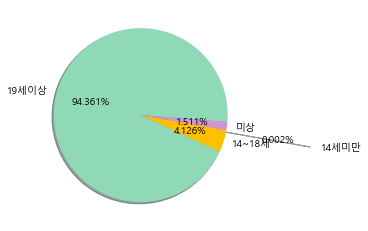

In [39]:
ratio = [0.002, 4.126, 94.361, 1.511]
labels = ['14세미만', '14~18세', '19세이상', '미상']
explode = [1, 0, 0, 0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1']

plt.pie(ratio, labels=labels, autopct='%.3f%%', startangle=350, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# 2015

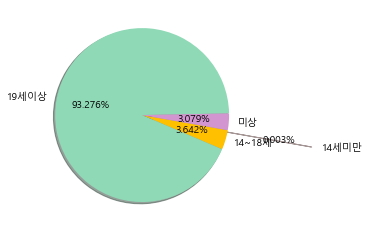

In [40]:
ratio = [0.003, 3.642, 93.276, 3.079]
labels = ['14세미만', '14~18세', '19세이상', '미상']
explode = [1, 0, 0, 0]

plt.pie(ratio, labels=labels, autopct='%.3f%%', startangle=350, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# 2016

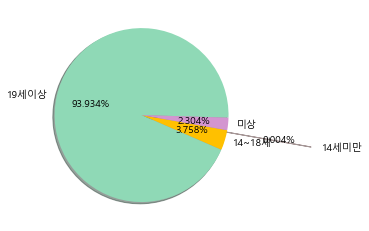

In [41]:
ratio = [0.004, 3.758, 93.934, 2.304]
labels = ['14세미만', '14~18세', '19세이상', '미상']
explode = [1, 0, 0, 0]

plt.pie(ratio, labels=labels, autopct='%.3f%%', startangle=350, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# 2017

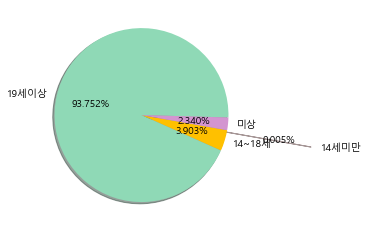

In [42]:
ratio = [0.005, 3.903, 93.752, 2.34]
labels = ['14세미만', '14~18세', '19세이상', '미상']
explode = [1, 0, 0, 0]

plt.pie(ratio, labels=labels, autopct='%.3f%%', startangle=350, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()